# Importing Important Libraries

In [269]:
import pandas as pd 
import numpy as np
import datetime as dt

# Importing data

In [270]:
features = pd.read_csv(r'D:\Study\Alabs\Data Science\Projects\project\2. Walmart Store Sales Forecasting\data\features.csv')

In [271]:
stores = pd.read_csv(r'D:\Study\Alabs\Data Science\Projects\project\2. Walmart Store Sales Forecasting\data\stores.csv')

In [272]:
train = pd.read_csv(r'D:\Study\Alabs\Data Science\Projects\project\2. Walmart Store Sales Forecasting\data\train.csv')

In [273]:
test = pd.read_csv(r'D:\Study\Alabs\Data Science\Projects\project\2. Walmart Store Sales Forecasting\data\test.csv')

In [274]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [275]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [276]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [277]:
train  = train.merge(stores,how = 'inner', on ='Store')

In [278]:
train = train.merge(features,how='inner', on =['Store','Date','IsHoliday'])

In [279]:
test  = test.merge(stores,how = 'inner', on ='Store')

In [280]:
test = test.merge(features,how='inner', on =['Store','Date','IsHoliday'])

# Data Exploration

In [281]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [282]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [283]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [284]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
Store           115064 non-null int64
Dept            115064 non-null int64
Date            115064 non-null object
IsHoliday       115064 non-null bool
Type            115064 non-null object
Size            115064 non-null int64
Temperature     115064 non-null float64
Fuel_Price      115064 non-null float64
MarkDown1       114915 non-null float64
MarkDown2       86437 non-null float64
MarkDown3       105235 non-null float64
MarkDown4       102176 non-null float64
MarkDown5       115064 non-null float64
CPI             76902 non-null float64
Unemployment    76902 non-null float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


In [285]:
train['Date']=pd.to_datetime(train.Date,format = '%Y-%m-%d') #Change string to dates
#train['Year'] = pd.DatetimeIndex(train['Date']).year
#train['Month'] = pd.DatetimeIndex(train['Date']).month
#train['Quarter'] = pd.DatetimeIndex(train['Date']).quarter
#train['Week'] = pd.DatetimeIndex(train['Date']).week

In [286]:
test['Date']=pd.to_datetime(test.Date,format = '%Y-%m-%d') #Change string to dates
#test['Year'] = pd.DatetimeIndex(test['Date']).year
#test['Month'] = pd.DatetimeIndex(test['Date']).month
#test['Quarter'] = pd.DatetimeIndex(test['Date']).quarter
#test['Week'] = pd.DatetimeIndex(test['Date']).week

In [287]:
a = pd.Series(['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08'])
a = pd.to_datetime(a, format = '%Y-%m-%d')
b = pd.Series(['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06'])
b = pd.to_datetime(b, format = '%Y-%m-%d')
c = pd.Series(['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29'])
c = pd.to_datetime(c, format = '%Y-%m-%d')
d = pd.Series(['2010-12-31', '2011-12-30', '2012-12-28', '2013-11-27'])
d = pd.to_datetime(d, format = '%Y-%m-%d')


In [288]:
train['SuperBowl'] = np.where(train.Date.apply(lambda x: x in list(a)),1,0)
train['LabourDay'] = np.where(train.Date.apply(lambda x: x in list(b)),1,0)
train['Thanksgiving'] = np.where(train.Date.apply(lambda x: x in list(c)),1,0)
train['Christmas'] = np.where(train.Date.apply(lambda x: x in list(d) ),1,0)

In [289]:
test['SuperBowl'] = np.where(test.Date.apply(lambda x: x in list(a)),1,0)
test['LabourDay'] = np.where(test.Date.apply(lambda x: x in list(b)),1,0)
test['Thanksgiving'] = np.where(test.Date.apply(lambda x: x in list(c)),1,0)
test['Christmas'] = np.where(test.Date.apply(lambda x: x in list(d) ),1,0)

In [290]:
train.SuperBowl.sum()

8895

In [291]:
train_max = train.groupby(by=['Store','Dept']).agg({'Weekly_Sales':'max'}).rename(columns = {'Weekly_Sales':'max_WeeklySales'}).reset_index()
train_min = train.groupby(by=['Store','Dept']).agg({'Weekly_Sales':'min'}).rename(columns = {'Weekly_Sales':'min_WeeklySales'}).reset_index()
train_med = train.groupby(by=['Store','Dept']).agg({'Weekly_Sales':'median'}).rename(columns = {'Weekly_Sales':'med_WeeklySales'}).reset_index()
train_mean = train.groupby(by=['Store','Dept']).agg({'Weekly_Sales':'mean'}).rename(columns = {'Weekly_Sales':'avg_WeeklySales'}).reset_index()
train_std = train.groupby(by=['Store','Dept']).agg({'Weekly_Sales':'std'}).rename(columns = {'Weekly_Sales':'std_WeeklySales'}).reset_index()

In [292]:
#for i in [train_max ,train_min ,train_med,train_mean,train_std]:
#    train = train.merge(i,on = ['Store','Dept'])

# Separating Categorical and Continuous Data

In [293]:
cat = train.loc[:,['Store','Dept','IsHoliday','Type','SuperBowl','LabourDay','Thanksgiving','Christmas']]

In [294]:
cat_test = test.loc[:,['Store','Dept','IsHoliday','Type','SuperBowl','LabourDay','Thanksgiving','Christmas']]

In [295]:
con = train.loc[:,train.columns.difference(['Store','Dept','IsHoliday','Type','SuperBowl','LabourDay','Thanksgiving','Christmas'])]

In [296]:
con_test = test.loc[:,train.columns.difference(['Store','Dept','IsHoliday','Type','SuperBowl','LabourDay','Thanksgiving','Christmas'])]

C:\Users\vishe\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [297]:
con = con.drop(columns = 'Date')

In [298]:
con_test = con_test.drop(columns = 'Date')

In [299]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=con.apply(lambda x: var_summary(x)).T

In [300]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
CPI,421570.0,0.0,7.217360e+07,171.201947,182.31878,39.159276,1.533449e+03,126.064,126.111903,126.496258,128.823806,132.022667,182.31878,212.416993,219.444244,221.941558,225.473509,227.232807
Fuel_Price,421570.0,0.0,1.416908e+06,3.361027,3.45200,0.458515,2.102356e-01,2.472,2.565000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,150681.0,270889.0,1.091898e+09,7246.420196,5347.45000,8291.221345,6.874435e+07,0.270,17.760000,149.190000,375.200000,2240.270000,5347.45000,9210.900000,15282.470000,21801.350000,41524.030000,88646.760000
MarkDown2,111248.0,310322.0,3.709708e+08,3334.628621,192.00000,9475.357325,8.978240e+07,-265.760,-0.990000,1.950000,6.980000,41.600000,192.00000,1926.940000,8549.740000,16497.470000,50366.600000,104519.540000
MarkDown3,137091.0,284479.0,1.973317e+08,1439.421384,24.60000,9623.078290,9.260364e+07,-29.100,0.060000,0.650000,1.650000,5.080000,24.60000,103.990000,400.090000,1059.900000,63143.290000,141630.610000
MarkDown4,134967.0,286603.0,4.566161e+08,3383.168256,1481.31000,6292.384031,3.959410e+07,0.220,3.970000,28.760000,108.710000,504.220000,1481.31000,3595.040000,7871.420000,12645.960000,35785.260000,67474.850000
MarkDown5,151432.0,270138.0,7.009750e+08,4628.975079,3359.45000,5962.887455,3.555603e+07,135.160,351.970000,715.520000,1070.830000,1878.440000,3359.45000,5563.800000,8337.700000,11269.240000,27754.230000,108519.280000
Size,421570.0,0.0,5.764039e+10,136727.915739,140167.00000,60980.583328,3.718632e+09,34875.000,34875.000000,39690.000000,39910.000000,93638.000000,140167.00000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,421570.0,0.0,2.533217e+07,60.090059,62.09000,18.447931,3.403262e+02,-2.060,18.300000,27.310000,33.980000,46.680000,62.09000,74.280000,83.580000,87.270000,92.810000,100.140000
Unemployment,421570.0,0.0,3.355819e+06,7.960289,7.86600,1.863296,3.471872e+00,3.879,4.156000,5.326000,5.965000,6.891000,7.86600,8.572000,9.816000,12.187000,14.180000,14.313000


In [301]:
#summary of categorical variables
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=cat.apply(lambda x: cat_summary(x))

In [302]:
cat_summary.T

,N,NMISS,ColumnsNames
Store,421570,0,13 10474 10 10315 4 10272 1 1024...
Dept,421570,0,1 6435 10 6435 38 6435 21 6435 67...
IsHoliday,421570,0,False 391909 True 29661 Name: IsHolida...
Type,421570,0,A 215478 B 163495 C 42597 Name: Type...
SuperBowl,421570,0,"0 412675 1 8895 Name: SuperBowl, dtype..."
LabourDay,421570,0,"0 412709 1 8861 Name: LabourDay, dtype..."
Thanksgiving,421570,0,"0 415611 1 5959 Name: Thanksgiving, dt..."
Christmas,421570,0,"0 415624 1 5946 Name: Christmas, dtype..."


# Dummy Creation

In [303]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

for c_feature in cat.columns.difference(['Date','IsHoliday','SuperBowl','LabourDay','Thanksgiving','Christmas']):
    cat[c_feature] = cat[c_feature].astype('category')
    cat = create_dummies(cat , c_feature )

In [304]:
for c_feature in cat_test.columns.difference(['IsHoliday','SuperBowl','LabourDay','Thanksgiving','Christmas']):
    cat_test[c_feature] = cat_test[c_feature].astype('category')
    cat_test = create_dummies(cat_test , c_feature )

In [305]:
#Converting data into numerics.
cat.IsHoliday[cat.IsHoliday == True] = 1
cat.IsHoliday[cat.IsHoliday == False] = 0
cat.IsHoliday = cat.IsHoliday.astype(int)


C:\Users\vishe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [306]:
cat_test.IsHoliday[cat_test.IsHoliday == True] = 1
cat_test.IsHoliday[cat_test.IsHoliday == False] = 0
cat_test.IsHoliday = cat_test.IsHoliday.astype(int)


C:\Users\vishe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [307]:
for i in list(cat.columns):
    if i.startswith('T'):
        print(i)

Thanksgiving
Type_B
Type_C


# Null Values

In [308]:
con = con.apply(lambda x :  np.where(x<=0,np.nan,x))

In [309]:
con_test = con_test.apply(lambda x :  np.where(x<=0,np.nan,x))

In [310]:
con = con.fillna(0)
con.duplicated().sum()
cat.duplicated().sum()

405944

In [311]:
con_test = con_test.fillna(0)

# outlier treatment


In [312]:
def outlier_capping(x, upper=0.99,lower=0.01):
    x = x.clip_upper(x.quantile(upper))
    x = x.clip_lower(x.quantile(lower))
    return x
con.loc[:,con.columns.difference(['Weekly_Sales'])] = con.loc[:,con.columns.difference(['Weekly_Sales'])].apply(lambda x: outlier_capping(x))

C:\Users\vishe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vishe\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


In [313]:
con_test.loc[:,con_test.columns] = con_test.loc[:,con_test.columns].apply(lambda x: outlier_capping(x))

C:\Users\vishe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vishe\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


In [314]:
from sklearn.feature_selection import VarianceThreshold

In [315]:
train_new = pd.concat([cat,con], axis = 1)

In [316]:
test_new = pd.concat([cat_test,con_test], axis = 1)

In [317]:
train_new = train_new[train_new.Weekly_Sales > 0]

In [318]:
train_new['ln_Weekly_Sales'] = np.log(train_new.Weekly_Sales) #Making y normally distributed.

In [319]:
train_new = train_new.drop(columns = 'Weekly_Sales')

In [320]:
import seaborn as sns

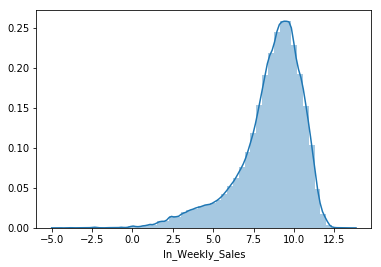

In [321]:
sns.distplot(train_new.ln_Weekly_Sales)

In [322]:
X_train = train_new.loc[:,train_new.columns.difference(['ln_Weekly_Sales'])]

In [323]:
X_test = test_new.loc[:,:]

In [324]:
Y_train = train_new['ln_Weekly_Sales']


# Removing correlated Variables.

In [325]:
def correlation(dataset, threshold):

    col_corr = set()  # Set of all the names of correlated columns

    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):

        for j in range(i):

            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value

                colname = corr_matrix.columns[i]  # getting the name of column

                col_corr.add(colname)

    return col_corr

In [326]:
corr_features = correlation(X_train, 0.7)
print('correlated features: ', len(set(corr_features)) )

correlated features:  1


In [327]:
X_train.drop(labels=corr_features, axis=1, inplace=True)

In [328]:
X_test.drop(labels=corr_features, axis=1, inplace=True)

In [329]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Anova Testing.

In [330]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(  X_train, Y_train )

In [331]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(X_train.columns.difference(['Date']), F_values,  ['%.3f' % p for p in p_values])]

In [332]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [333]:
f_reg_results.sort_values(by=['P_Value'])

,Variable,F_Value,P_Value
0,CPI,123.099892,0.000
98,Store_18,159.237275,0.000
96,Store_16,696.606039,0.000
95,Store_15,177.909242,0.000
94,Store_14,1650.275431,0.000
93,Store_13,1696.717287,0.000
92,Store_12,24.332759,0.000
91,Store_11,867.366118,0.000
90,Store_10,1270.420926,0.000
89,Size,46487.725679,0.000


In [334]:
f_reg_results.P_Value = pd.to_numeric(f_reg_results.P_Value)

In [335]:
f_reg_results_new=f_reg_results[f_reg_results.P_Value<=0.2]

In [336]:
f_reg_results_new

,Variable,F_Value,P_Value
0,CPI,123.099892,0.000
1,Christmas,3.267568,0.071
2,Dept_10,526.809173,0.000
3,Dept_11,475.985456,0.000
4,Dept_12,1123.840000,0.000
5,Dept_13,4291.069303,0.000
6,Dept_14,659.029867,0.000
7,Dept_16,172.028614,0.000
8,Dept_17,31.846404,0.000
9,Dept_18,4924.735688,0.000


In [337]:
list_vars = list(f_reg_results_new.Variable)

In [338]:
list_vars

['CPI',
 'Christmas',
 'Dept_10',
 'Dept_11',
 'Dept_12',
 'Dept_13',
 'Dept_14',
 'Dept_16',
 'Dept_17',
 'Dept_18',
 'Dept_19',
 'Dept_2',
 'Dept_20',
 'Dept_21',
 'Dept_22',
 'Dept_23',
 'Dept_24',
 'Dept_25',
 'Dept_26',
 'Dept_27',
 'Dept_28',
 'Dept_29',
 'Dept_3',
 'Dept_30',
 'Dept_31',
 'Dept_32',
 'Dept_34',
 'Dept_35',
 'Dept_36',
 'Dept_37',
 'Dept_38',
 'Dept_39',
 'Dept_4',
 'Dept_40',
 'Dept_41',
 'Dept_42',
 'Dept_43',
 'Dept_44',
 'Dept_45',
 'Dept_46',
 'Dept_47',
 'Dept_48',
 'Dept_49',
 'Dept_5',
 'Dept_50',
 'Dept_51',
 'Dept_52',
 'Dept_54',
 'Dept_55',
 'Dept_56',
 'Dept_58',
 'Dept_59',
 'Dept_6',
 'Dept_60',
 'Dept_65',
 'Dept_7',
 'Dept_71',
 'Dept_72',
 'Dept_74',
 'Dept_77',
 'Dept_78',
 'Dept_79',
 'Dept_8',
 'Dept_80',
 'Dept_81',
 'Dept_82',
 'Dept_83',
 'Dept_85',
 'Dept_87',
 'Dept_9',
 'Dept_90',
 'Dept_91',
 'Dept_92',
 'Dept_93',
 'Dept_94',
 'Dept_95',
 'Dept_96',
 'Dept_97',
 'Dept_98',
 'Dept_99',
 'Fuel_Price',
 'IsHoliday',
 'LabourDay',
 'MarkD

In [339]:
X_train = X_train[list_vars]


In [340]:
X_test = X_test[list_vars]

# VIF

In [341]:
all_columns = "+".join(list_vars)
my_formula = "ln_Weekly_Sales~" + all_columns

print(my_formula)

ln_Weekly_Sales~CPI+Christmas+Dept_10+Dept_11+Dept_12+Dept_13+Dept_14+Dept_16+Dept_17+Dept_18+Dept_19+Dept_2+Dept_20+Dept_21+Dept_22+Dept_23+Dept_24+Dept_25+Dept_26+Dept_27+Dept_28+Dept_29+Dept_3+Dept_30+Dept_31+Dept_32+Dept_34+Dept_35+Dept_36+Dept_37+Dept_38+Dept_39+Dept_4+Dept_40+Dept_41+Dept_42+Dept_43+Dept_44+Dept_45+Dept_46+Dept_47+Dept_48+Dept_49+Dept_5+Dept_50+Dept_51+Dept_52+Dept_54+Dept_55+Dept_56+Dept_58+Dept_59+Dept_6+Dept_60+Dept_65+Dept_7+Dept_71+Dept_72+Dept_74+Dept_77+Dept_78+Dept_79+Dept_8+Dept_80+Dept_81+Dept_82+Dept_83+Dept_85+Dept_87+Dept_9+Dept_90+Dept_91+Dept_92+Dept_93+Dept_94+Dept_95+Dept_96+Dept_97+Dept_98+Dept_99+Fuel_Price+IsHoliday+LabourDay+MarkDown1+MarkDown2+MarkDown3+MarkDown5+Size+Store_10+Store_11+Store_12+Store_13+Store_14+Store_15+Store_16+Store_17+Store_18+Store_19+Store_2+Store_20+Store_21+Store_22+Store_23+Store_24+Store_25+Store_26+Store_27+Store_28+Store_29+Store_3+Store_30+Store_31+Store_32+Store_33+Store_35+Store_36+Store_37+Store_38+Store_39+S

In [342]:
X_train['ln_Weekly_Sales'] = Y_train

In [343]:
X = X_train

In [344]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# get y and X dataframes based on this regression
y_train, x_train = dmatrices(my_formula, X, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns

vif.round(1)

C:\Users\vishe\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1638945.1,Intercept
1,555.1,CPI
2,inf,Christmas
3,1.3,Dept_10
4,1.3,Dept_11
5,1.3,Dept_12
6,1.3,Dept_13
7,1.3,Dept_14
8,1.3,Dept_16
9,1.3,Dept_17


In [346]:
after_vif = vif.round(1)

In [363]:
a = after_vif[after_vif['VIF Factor'] < 2].features

In [382]:
X_train = X_train.loc[:,list(a)]

In [383]:
X_test = X_test.loc[:,list(a)]

# Creating Model.

In [384]:
dt = DecisionTreeRegressor(random_state = 0)

In [385]:
dt.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [386]:
dt.score(X_train,Y_train)

0.8630924348940375

In [388]:
Y_pred = dt.predict(X_test)

In [390]:
np.exp(Y_pred)

array([  7765.81247938,  71945.51      ,  18030.72      , ...,
       119343.17      ,  15235.17      ,   5111.25      ])